In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# K-Means Clustering

In K-Means clustering, given a data set $(x_i)_{i=1}^N$, and the number of clusters $K$, one tries to divide the dataset into disjoint $K$ parts $C_1,\dots,C_K$, and assign a center $z_1,\dots,z_K$ for each part, such that the following quantity is minimized
$$\sum_{k=1}^K\sum_{x \in C_k} ||x-z_k||^2 $$
The quantity above is called the inertia of $(C_k,z_k)_{k=1}^N$. A greedy approach to solve this optimization problem is as follows:

- Initiate $z_1,\dots,z_k$
- iteratively
 - Find $C_1,\dots,C_K$ minimizing the inertia, given $z_1,\dots,z_k$ from the previous step
 - Find $z_1,\dots,z_K$ minimizing the inertia, given $C_1,\dots,C_k$ from the previous step
 - Stop when algorithm stabilizes

Given centers $z_1,\dots,z_K$, the inertia minimizing clustering is given by
$$C_k = \{x_i: \underset{j}{argmin} ||x_i - z_j|| = k \}$$
Given clusters $C_1,\dots,C_K$, the inertia minimizing centers are given by
$$z_k = \text{mean}(C_k) $$

# Initializing Centers

As we want clusters to be far away from each away as much as possible, a good way to initialize centers is choosing them so that they are as far away from each other as possible. This can be done as follows:
- Let $z_1$ be a random point from the data set.
- Let $z_{k+1}=x_{i^*}$, where $i^*=\underset{i}{\text{argmax}} \min_{j=1,\dots,k} ||x_i - z_j|| $.

# Determining the number of clusters

Let $I_K$ denote the inertia of the clustering obtained by $K-means$ clustering algorithm with $K$ clusters for $K=1,\dots,K_{max}$. If the dataset originally has $K^*$ well seperated clusters, then we expect a sharp decrease in  $I_K$ over $K \leq K^*$, then a slower decrease for $K>K^*$. Hence, by checking the graph of the inertia, we can determine the optimal number of clusters.

# Implementation of K-Means Clustering

In [2]:
class KMeans:
    def __init__(self,K,max_iter=100,tol=1e-4,random_state=13):
        self.K=K
        self.random_state=random_state
        self.max_iter = max_iter
        self.tol=tol
    def fit(self,X):
        #initiate centers
        N=X.shape[0]
        np.random.seed(self.random_state)
        indices=[np.random.randint(N)]
        for _ in range(self.K-1):
            squared_distances = np.array([
                min([(x-y)@(x-y) for y in X[indices]])
            for x in X])
            indices.append(np.argmax(squared_distances))
        centers = X[indices]
        #update centers iteratively
        for i in range(self.max_iter):
            #find clusters
            clusters = np.argmin(np.array([[(x-z)@(x-z) for z in centers] for x in X]),axis=1)
            #update centers
            new_centers = np.array([X[clusters==k].mean(axis=0) for k in range(self.K)])
            if np.linalg.norm(centers-new_centers)<self.tol:
                break
            centers = new_centers
        self.num_iter = i+1
        self.centers=centers
    def predict(self,X):
        return np.argmin(np.array([[(x-z)@(x-z) for z in self.centers] for x in X]),axis=1)
    def inertia(self,X,y=[]):
        if len(y)==0:
            y=self.predict(X)
        inertia=0
        for k in range(self.K):
            cluster = (y==k)
            center = self.centers[k]
            inertia += sum([(x-center)@(x-center) for x in X[cluster]])
        return inertia

# Example

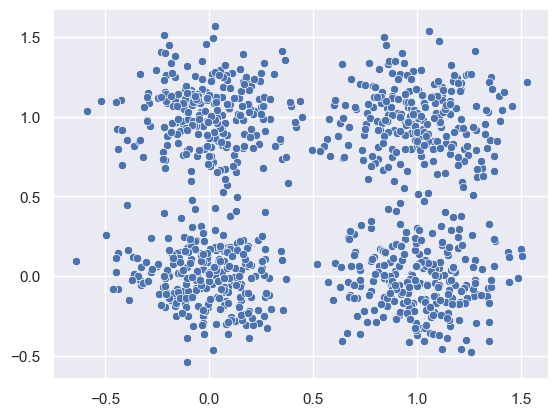

In [3]:
#create and visualize a data set
np.random.seed(13)
N=250
X=np.concatenate((
    0.2*np.random.randn(N,2)+np.array([0,0]),
    0.2*np.random.randn(N,2)+np.array([1,0]),
    0.2*np.random.randn(N,2)+np.array([0,1]),
    0.2*np.random.randn(N,2)+np.array([1,1]),
), axis=0)  
sns.scatterplot(x=X[:,0],y=X[:,1]);

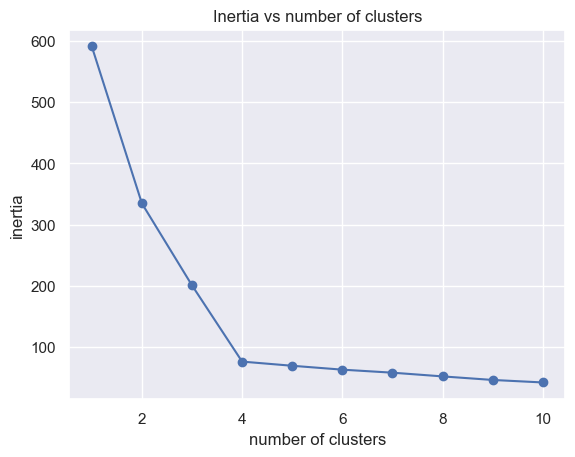

In [4]:
#choose the number of clusters
M=10
inertias = np.zeros(M)
for K in range(1,M+1):
    model = KMeans(K=K,random_state=13)
    model.fit(X)
    y=model.predict(X)
    inertias[K-1]=model.inertia(X,y)
plt.plot(range(1,M+1),inertias)
plt.scatter(range(1,M+1),inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.title('Inertia vs number of clusters');

Here we see that exaclty after 4 clusters, the decrease in inertia slows down. Hence, we use $K=4$ for clustering.

In [ ]:
#cluster and visualize
K=4
km = KMeans(K,random_state=17)
km.fit(X)
y=km.predict(X)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
sns.scatterplot(x=km.centers[:,0],y=km.centers[:,1],s=100)
plt.title(f'{K} clusters obtained by K-Means clustering and their centers');